In [3]:
import pandas as pd
import numpy as np
from HullWhite import HullWhite
from scipy.optimize import fsolve
S = np.arange(0,11)
T = np.arange(0,10.5,0.5)
beta = np.array([1.879892, 0.579211, 	3.993992, 1.445091])
tau  = np.array([ 16.633491, 	0.319680])
reversion=0.08670264780833303 #0.13949636660880768 
volatility=0.013928489964789946 #0.017793899652989272
HW = HullWhite(initial=0.02459103, reversion=reversion, volatility=volatility, b=beta, tau=tau)
K=fsolve(lambda x: HW.swap(0, S, T, x), x0=0.02)[0]

In [5]:
from scipy.stats import multivariate_normal as mvn
from sklearn.covariance import ledoit_wolf
import decimal
Te = 0.75

X = []
Y = []
for _ in range(100):
    sims=HW.create_path(0.25,0.75,0)[1][2::]
    X.append(sims[0])
    Y.append(sims[1])

HW.C(0, 0.5, Te)-np.cov(X,Y)

# print(mvn.pdf([0.0,0.0], mean=[HW.expectedRate(Te),HW.expectedRate(0.5)], cov=HW.C(0,Te,0.5)))

array([[7.50953825e-06, 3.50013876e-06],
       [3.50013876e-06, 1.75609974e-06]])

In [6]:
Te=0.51
mvn.pdf([0.0,0.0], mean=[HW.expectedRate(Te),HW.expectedRate(0.5)], cov=HW.C(0,Te,0.5))

83.761589548448

In [8]:
from joblib import load, Parallel, delayed, cpu_count, dump
import seaborn as sns
import time
EPE = load('./SimulationData/PE_10Y_Swap_N=100000_dt=365.joblib')
ENE = load('./SimulationData/NE_10Y_Swap_N=100000_dt=365.joblib')
anSwap = [HW.swaption(0,Te,S,T,K) for Te in np.arange(0,10+0.25,0.25)]

# def worker(Te):
#     return Te, HW.swaption(0,Te,S,T,K)

# AnalyticalPESwap10Y = Parallel(n_jobs=cpu_count())(delayed(worker)(Te) for Te in np.arange(0,10+1/365,1/365))
# dump(AnalyticalPESwap10Y, './SimulationData/AnalyticalPESwap10Y.joblib')

# def worker(Te):
#     return Te, HW.swaption(0,Te,S,T,K, payer=False)
# AnalyticalNESwap10Y = Parallel(n_jobs=cpu_count())(delayed(worker)(Te) for Te in np.arange(0,10+1/365,1/365))
# dump(AnalyticalNESwap10Y, './SimulationData/AnalyticalNESwap10Y.joblib')

<Axes: >

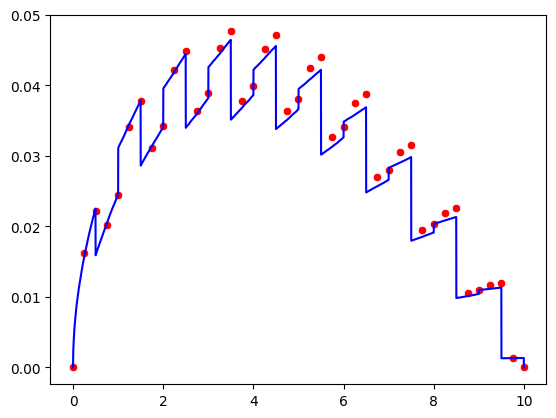

In [6]:
discounting = np.array([HW.ZCB(0,Te) for Te in np.arange(0,10+1/365,1/365)])

sns.lineplot(x=np.arange(0,10+1/365,1/365),y=discounting*np.array(EPE), color='blue')
sns.scatterplot(x=np.arange(0,10+0.25,0.25),y=anSwap, color ="red")

In [12]:
from scipy.integrate import quad
intervals = np.linspace(0,10,cpu_count())
# quad(lambda x: HW.swaption(0,x,S,T,K), 0, 10)
def worker(a,b):
    return quad(lambda x: HW.swaption(0,x,S,T,K), a, b, epsabs=1e-4, epsrel=1e-4)

# result = Parallel(n_jobs=cpu_count())(delayed(worker)(intervals[i], intervals[i+1]) for i in range(len(intervals)-1))

In [13]:
worker(0,1)[0]

In [12]:
for i in range(len(intervals)-1):
    print(intervals[i],intervals[i+1])

0.0 0.6666666666666666
0.6666666666666666 1.3333333333333333
1.3333333333333333 2.0
2.0 2.6666666666666665
2.6666666666666665 3.333333333333333
3.333333333333333 4.0
4.0 4.666666666666666
4.666666666666666 5.333333333333333
5.333333333333333 6.0
6.0 6.666666666666666
6.666666666666666 7.333333333333333
7.333333333333333 8.0
8.0 8.666666666666666
8.666666666666666 9.333333333333332
9.333333333333332 10.0
